In [98]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치        
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [99]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [83]:
hospital_2020

,ACCOUNTDATE,CNT
0,2020-01-01,158
1,2020-01-02,992
2,2020-01-03,910
3,2020-01-04,615
4,2020-01-05,92
5,2020-01-06,1136
6,2020-01-07,880
7,2020-01-08,863
8,2020-01-09,923
9,2020-01-10,928


In [81]:
hospital_2019=hospital_2019.drop([5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362])

In [85]:
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [100]:
all=pd.concat([hospital_2019,hospital_2020])

In [101]:
all.columns=['ds','y']

In [102]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      731 non-null    object
 1   y       731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.1+ KB


In [103]:
all['ds']=pd.to_datetime(all['ds'])

In [104]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      731 non-null    datetime64[ns]
 1   y       731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.1 KB


In [105]:
from fbprophet import Prophet

In [106]:
m=Prophet()
m.fit(all)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)

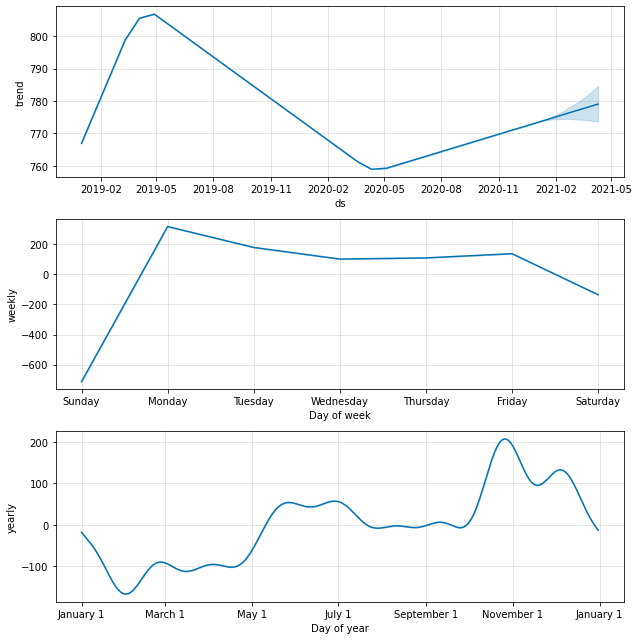

In [108]:
fig2=m.plot_components(forecast)

In [109]:
from fbprophet.plot import add_changepoints_to_plot

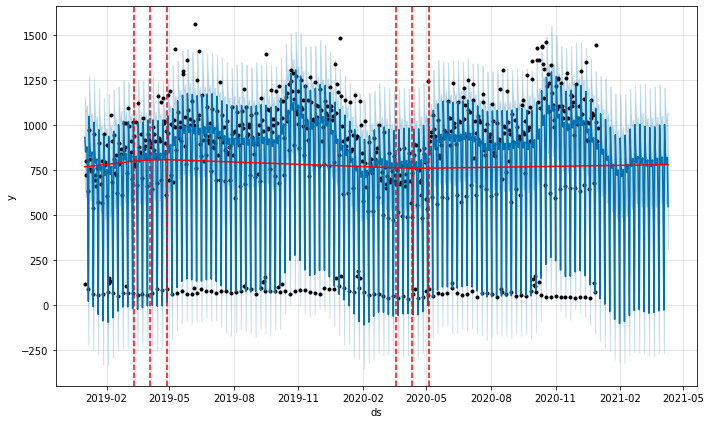

In [110]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


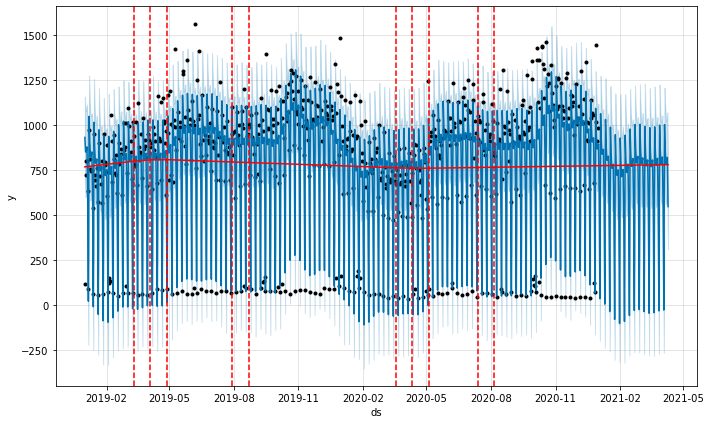

In [111]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(all)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

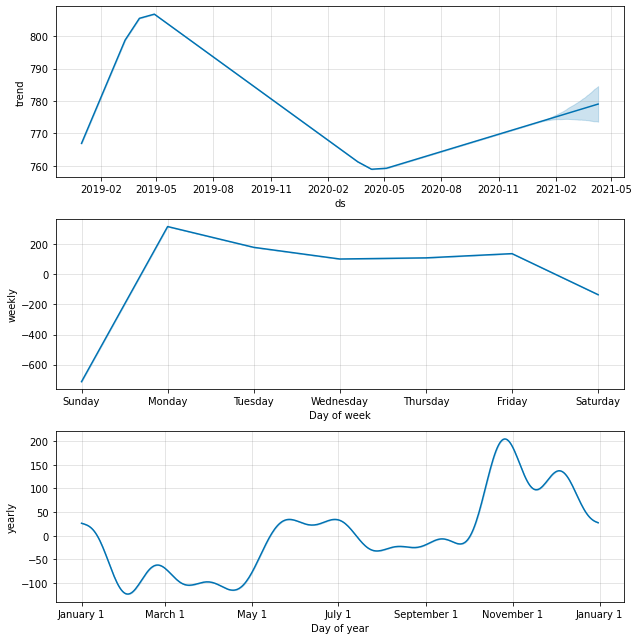

In [112]:
fig2=m.plot_components(forecast)

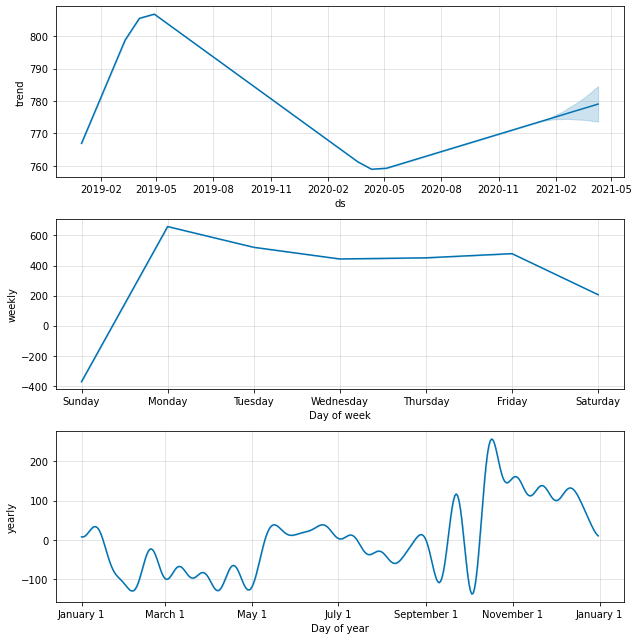

In [115]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=20,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(all)
fig = m.plot_components(forecast)